In [1]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data_clean.csv")
print(data)

     Unnamed: 0  Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
0             1   41.0    190.0   7.4     67     5    1  2010    67       S
1             2   36.0    118.0   8.0     72     5    2  2010    72       C
2             3   12.0    149.0  12.6     74     5    3  2010    74      PS
3             4   18.0    313.0  11.5     62     5    4  2010    62       S
4             5    NaN      NaN  14.3     56     5    5  2010    56       S
..          ...    ...      ...   ...    ...   ...  ...   ...   ...     ...
153         154   41.0    190.0   7.4     67     5    1  2010    67       C
154         155   30.0    193.0   6.9     70     9   26  2010    70      PS
155         156    NaN    145.0  13.2     77     9   27  2010    77       S
156         157   14.0    191.0  14.3     75     9   28  2010    75       S
157         158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 10 columns]


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [4]:
#Dataframe attributes
print(type(data))
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
(158, 10)
1580


In [5]:
#Drop duplicate column(Temp C) and Unnamed column
data1 = data.drop(['Unnamed: 0',"Temp C"], axis = 1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [7]:
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [8]:
#check for duplicated rows in table
#print only the duplicated row(one) only
data1[data1.duplicated()]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [9]:
#print all duplicated rows
data1[data1.duplicated(keep = False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9.0,28,2010,75,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [10]:
#drop duplicated rows
data1.drop_duplicates(keep='first', inplace = True)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [11]:
#change column names (rename the columns)
data1.rename({'Solar.R': 'Solar'}, axis=1, inplace = True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    119 non-null    float64
 1   Solar    150 non-null    float64
 2   Wind     157 non-null    float64
 3   Month    156 non-null    float64
 4   Day      157 non-null    int64  
 5   Year     157 non-null    int64  
 6   Temp     157 non-null    int64  
 7   Weather  154 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 11.0+ KB


In [13]:
#display data1 missing values count in each column using isnull().sum()
data1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

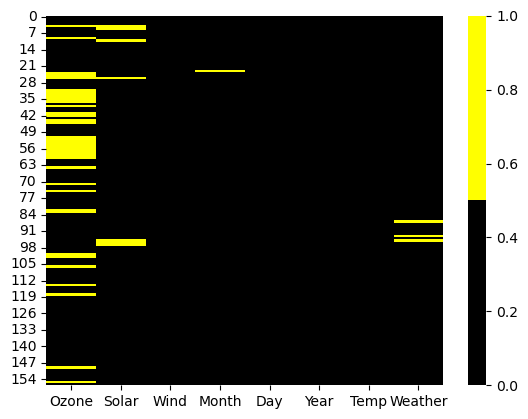

In [14]:
#visualize data1 missing values using graph
cols = data1.columns
colors = ['black', 'yellow']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar = True)


In [15]:
#find the mean and median values of each numeric column
#imputation of missing value with median
median_ozone = data1["Ozone"].median()
mean_ozone = data1["Ozone"].mean()
print("Median of Ozone: ", median_ozone)
print("Mean of Ozone: ", mean_ozone)

Median of Ozone:  31.0
Mean of Ozone:  41.81512605042017


In [16]:
#replace the ozone missing values with median value
data1['Ozone'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [17]:
median_solar = data1["Solar"].median()
mean_solar = data1["Solar"].mean()
data1['Solar'] = data1['Solar'].fillna(median_solar)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [18]:
#replace the ozone missing values with mean value
median_solar = data1["Solar"].median()
mean_solar = data1["Solar"].mean()
data1['Solar'] = data1['Solar'].fillna(mean_solar)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [19]:
#print the data1 5 rows
data1.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,31.0,199.0,14.3,5.0,5,2010,56,S


In [20]:
#find the mode values of categorical columns (weather)
print(data1["Weather"].value_counts())
mode_weather = data1["Weather"].mode()[0]
print(mode_weather)

Weather
S     58
C     49
PS    47
Name: count, dtype: int64
S


In [21]:
#Imput missing values(Replace NaN with mean/median, mode etc.) using fillna()
data1["Weather"] = data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [22]:
print(data1["Month"].value_counts())
mode_month = data1["Month"].mode()[0]
print(mode_month)
data1["Month"] = data1["Month"].fillna(mode_month)
data1.isnull().sum()

Month
9.0    33
5.0    31
7.0    31
8.0    31
6.0    30
Name: count, dtype: int64
9.0


Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [23]:
#reset the index column
data1.reset_index(drop=True)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,31.0,199.0,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,31.0,145.0,13.2,9.0,27,2010,77,S


Detection of outliers in the columns

Method1 : Using histogram and boxplot

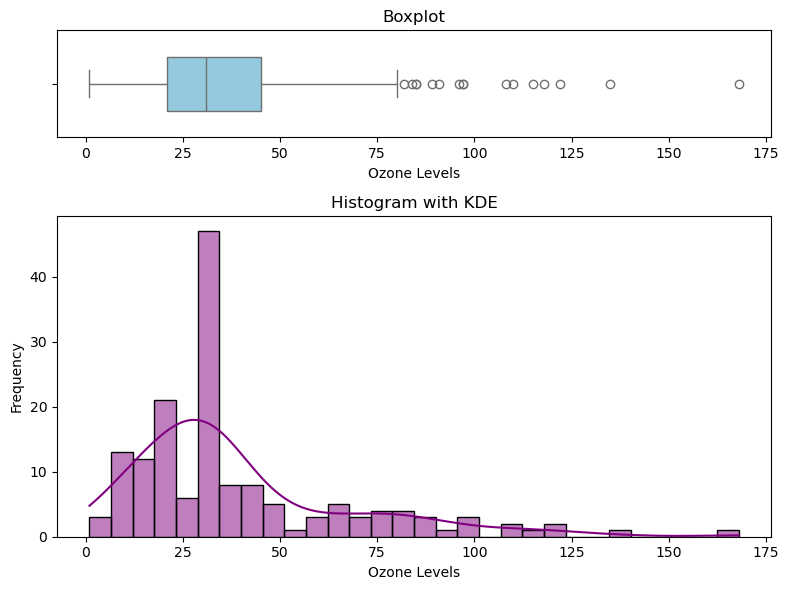

In [25]:
# Create a figure with two subplots, stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

# Plot the boxplot in the first (top) subplot.
sns.boxplot(data=data1["Ozone"], ax=axes[0], color='skyblue', width=0.5, orient='h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")

# Plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(data1["Ozone"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

# Adjust Layout for better spacing
plt.tight_layout()

#show the plot
plt.show()

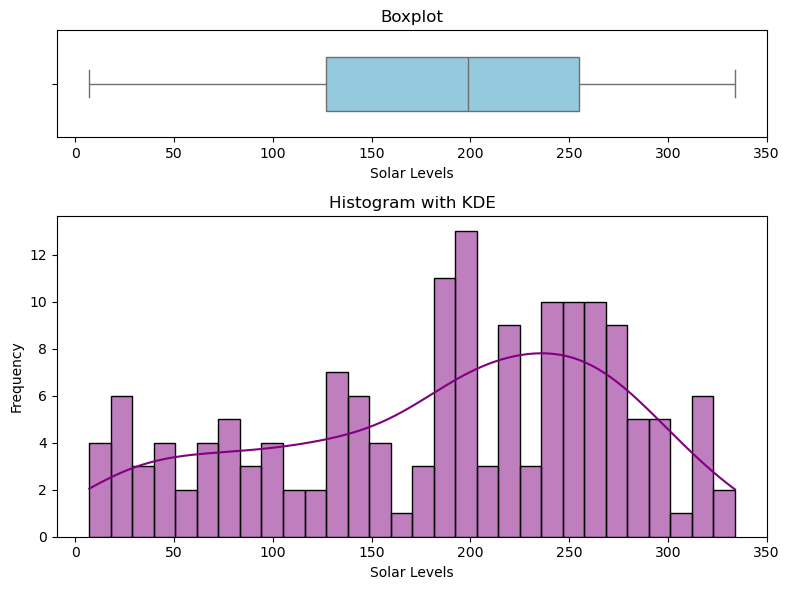

In [26]:
# Create a figure with two subplots, stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

# Plot the boxplot in the first (top) subplot.
sns.boxplot(data=data1["Solar"], ax=axes[0], color='skyblue', width=0.5, orient='h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Solar Levels")

# Plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(data1["Solar"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Solar Levels")
axes[1].set_ylabel("Frequency")

# Adjust Layout for better spacing
plt.tight_layout()

#show the plot
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x28322c93770>,
 'caps': [<matplotlib.lines.Line2D at 0x28322dc7c20>,
 'boxes': [<matplotlib.lines.Line2D at 0x28322dc7500>],
 'medians': [<matplotlib.lines.Line2D at 0x28322df40b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28322df4320>],
 'means': []}

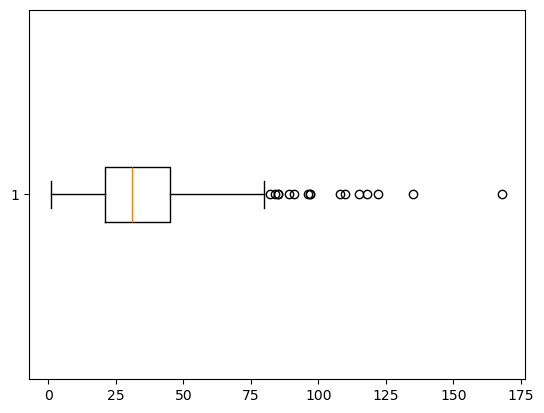

In [27]:
plt.boxplot(data1["Ozone"], vert= False)

#### observations 
 - The ozone column has extreme values beyond 81 as seen from boxplot
 - The same is confirmed from the below right=skewed histogram

### observations
 - No outliers are observed
 - It is not perfectly symmetric and slightly left skewed

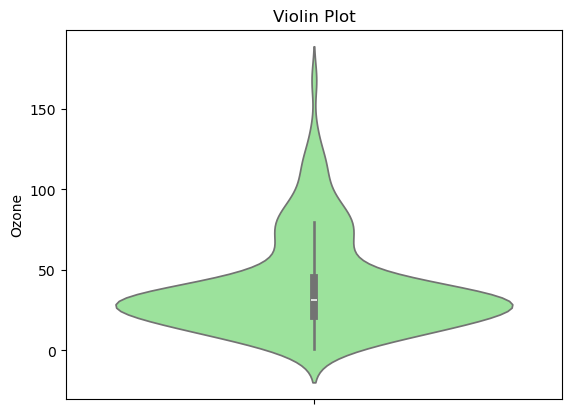

In [30]:
#create a figure for violen plot
sns.violinplot(data=data1["Ozone"], color='lightgreen')
plt.title("Violin Plot")

#show the plot
plt.show()

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

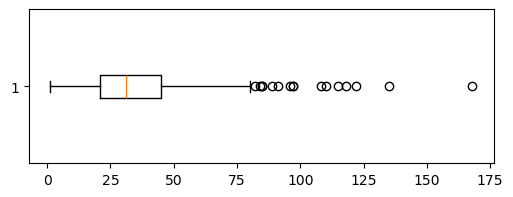

In [31]:
#Extract outliers from boxplot for Ozone column
plt.figure(figsize=(6,2))
boxplot_data = plt.boxplot(data1["Ozone"], vert=False)
[item.get_xdata() for item in boxplot_data['fliers']]

Method 2
 - Using mu +/-3*sigma limits

In [33]:
data1["Ozone"].describe()

count    157.000000
mean      39.197452
std       28.781992
min        1.000000
25%       21.000000
50%       31.000000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [34]:
mu = data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]

for x in data1["Ozone"]:
    if ((x < (mu - 3*sigma)) or (x > (mu + 3*sigma))):
        print(x)

135.0
168.0


C:\Users\admin\AppData\Local\Temp\ipykernel_15228\3121128980.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = data1["Ozone"].describe()[1]
C:\Users\admin\AppData\Local\Temp\ipykernel_15228\3121128980.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = data1["Ozone"].describe()[2]


Quantile-Quantile plot for detection of outliers

Text(0.5, 0, 'Theoretical Quantiles')

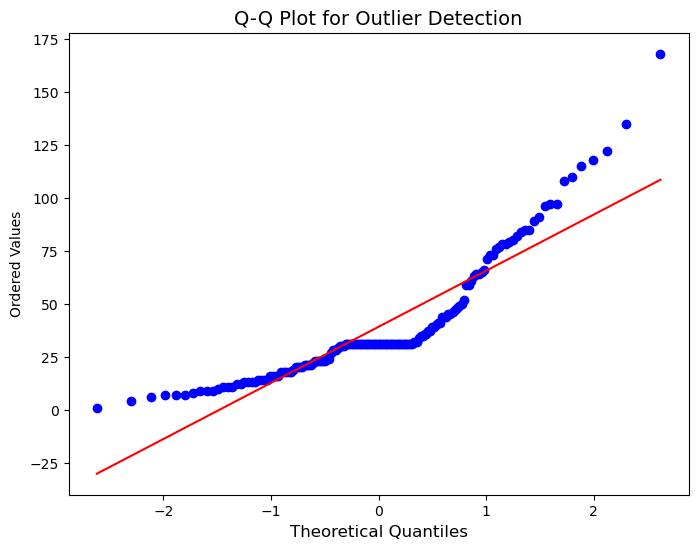

In [36]:
import scipy.stats as stats

#create Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data1["Ozone"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Outlier Detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)

Text(0.5, 0, 'Theoretical Quantiles')

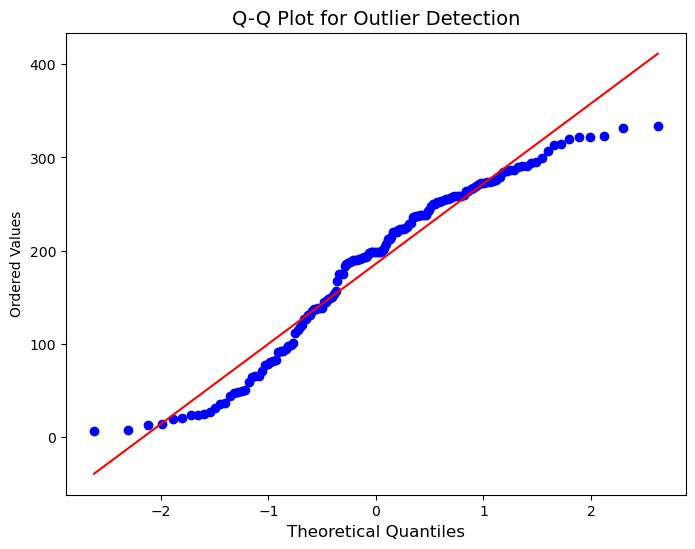

In [37]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(data1["Solar"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Outlier Detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)

Observations from Q-Q plot
 - the data does not follow normal distribution as the data points are deviating significantly away from the red line
 - the data shows a right-skewed distribution and possible outliers

Other visualizations that could help understand the data

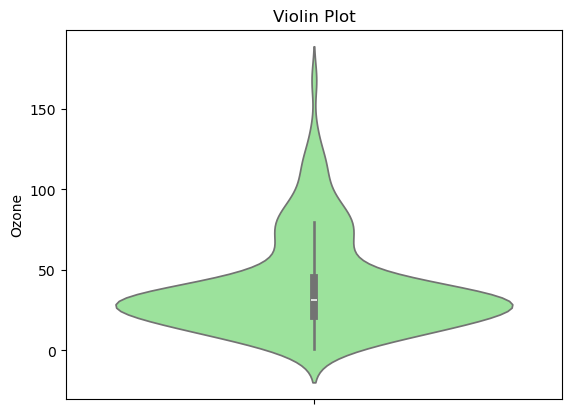

In [40]:
#create a figure for violin plot

sns.violinplot(data=data1["Ozone"], color='lightgreen')
plt.title("Violin Plot")

#show the plot
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_15228\4024217822.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data1, x = "Weather", y = "Ozone", palette="Set2")


<Axes: xlabel='Weather', ylabel='Ozone'>

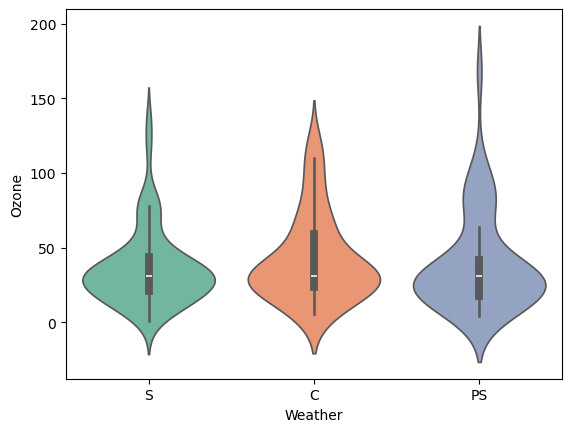

In [41]:
sns.violinplot(data=data1, x = "Weather", y = "Ozone", palette="Set2")

C:\Users\admin\AppData\Local\Temp\ipykernel_15228\1222012946.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2", size=6)


<Axes: xlabel='Weather', ylabel='Ozone'>

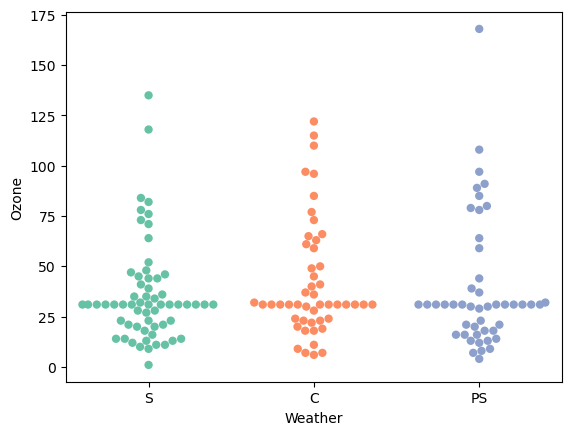

In [42]:
sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2", size=6)

C:\Users\admin\AppData\Local\Temp\ipykernel_15228\2802794007.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set1", size=6,jitter = True)


<Axes: xlabel='Weather', ylabel='Ozone'>

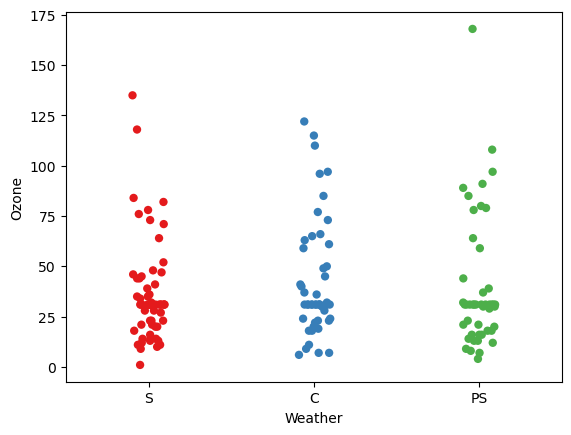

In [43]:
sns.stripplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set1", size=6,jitter = True)

<Axes: xlabel='Ozone', ylabel='Density'>

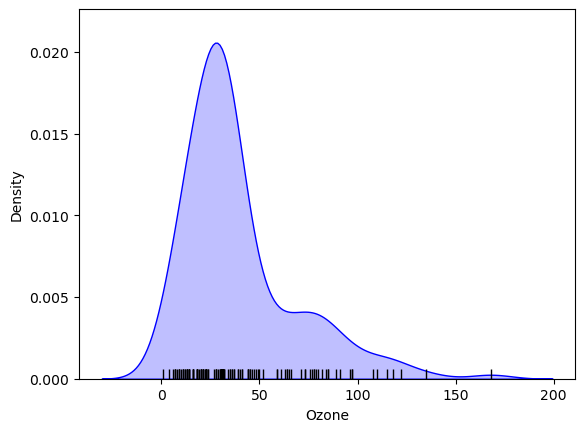

In [44]:
sns.kdeplot(data=data1["Ozone"], fill=True, color="blue")
sns.rugplot(data=data1["Ozone"], color="black")

<Axes: xlabel='Weather', ylabel='Ozone'>

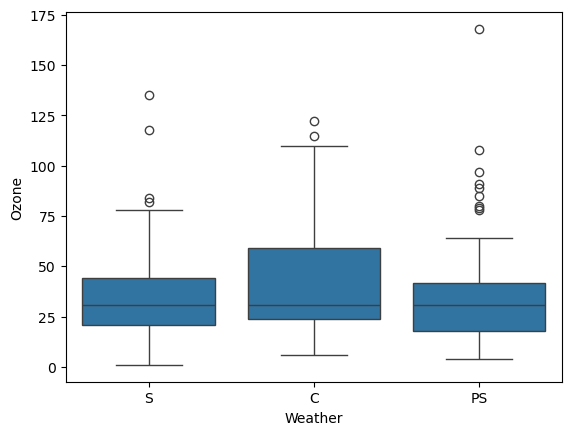

In [45]:
#category wise boxplot for ozone
sns.boxplot(data = data1, x = "Weather", y="Ozone")

Correlation coefficient and pair plots

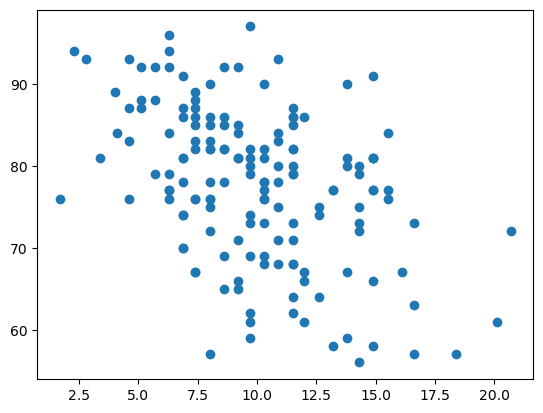

In [47]:
plt.scatter(data1["Wind"], data1["Temp"])

In [48]:
#compute person correlation coefficient
#between wind speed and temperature
data1["Wind"].corr(data1["Temp"])

-0.44122806925588215

In [97]:
#read all numeric (continuous) columns into a new table
data1_numeric = data1.iloc[:,[0,1,2,6]]
data1_numeric

,Ozone,Solar,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
4,31.0,199.0,14.3,56
...,...,...,...,...
152,20.0,223.0,11.5,68
153,41.0,190.0,7.4,67
154,30.0,193.0,6.9,70
155,31.0,145.0,13.2,77


Observation
 - The correlation between wind and temp is observed to be negatively correlated with mild strength

In [95]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    157 non-null    float64
 1   Solar    157 non-null    float64
 2   Wind     157 non-null    float64
 3   Month    157 non-null    float64
 4   Day      157 non-null    int64  
 5   Year     157 non-null    int64  
 6   Temp     157 non-null    int64  
 7   Weather  157 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 15.1+ KB


In [99]:
#print correlation coefficients for all the above columns
data1_numeric.corr()

,Ozone,Solar,Wind,Temp
Ozone,1.000000,0.297561,-0.523738,0.597087
Solar,0.297561,1.000000,-0.057709,0.256994
Wind,-0.523738,-0.057709,1.000000,-0.441228
Temp,0.597087,0.256994,-0.441228,1.000000


Observations
 - The highest correlation strength is observed between Ozone and Temperature(0.597087)
 - The next higher correlation strength is observedd between Ozone and Wind(-0.523738)
 - The next higher correlation strength is observed between wind and temp(-0.441228)
 - The least correlation strength is observed between solar and wind(-0.055874)

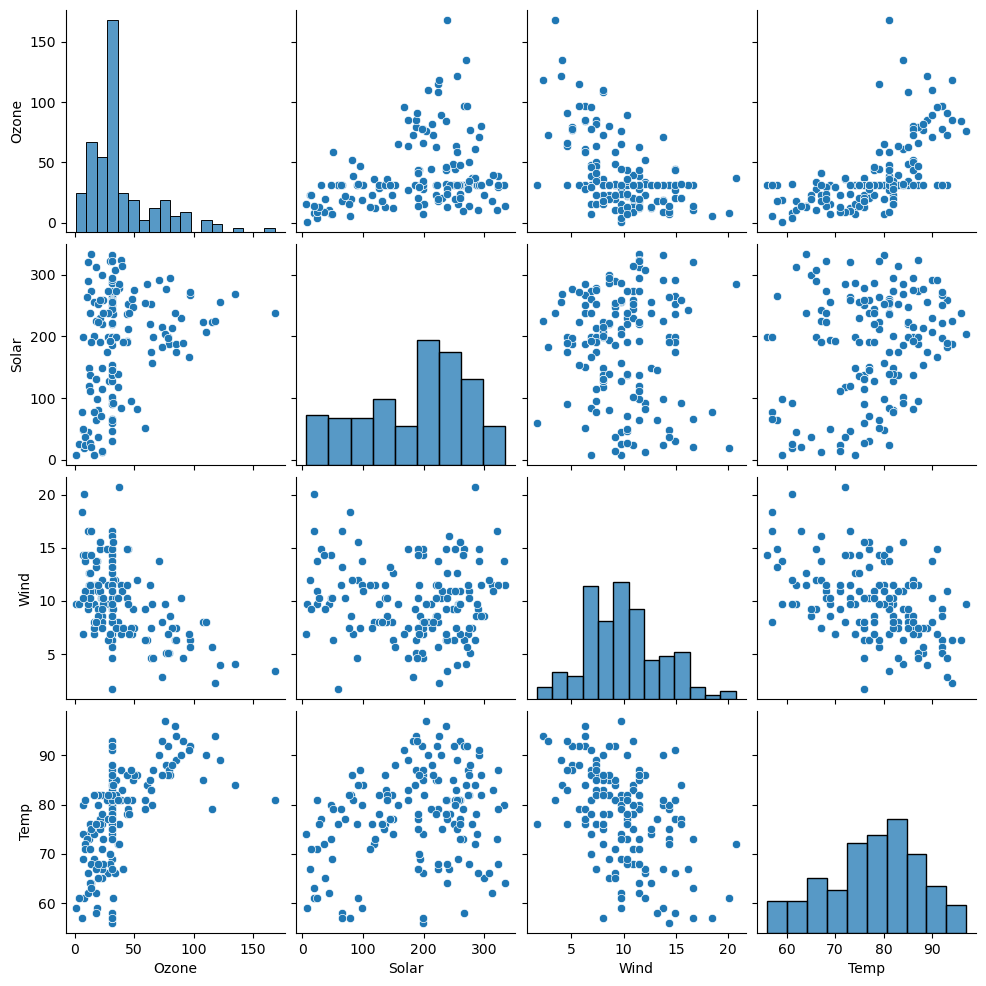

In [104]:
#plot a pair plot between all numeric columns using seaborn
sns.pairplot(data1_numeric)

Transformations

In [111]:
#creating dummy variable for weather column
data2=pd.get_dummies(data1,columns=['Month','Weather'])
data2

,Ozone,Solar,Wind,Day,Year,Temp,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Weather_C,Weather_PS,Weather_S
0,41.0,190.0,7.4,1,2010,67,True,False,False,False,False,False,False,True
1,36.0,118.0,8.0,2,2010,72,True,False,False,False,False,True,False,False
2,12.0,149.0,12.6,3,2010,74,True,False,False,False,False,False,True,False
3,18.0,313.0,11.5,4,2010,62,True,False,False,False,False,False,False,True
4,31.0,199.0,14.3,5,2010,56,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,30,2010,68,False,False,False,False,True,False,False,True
153,41.0,190.0,7.4,1,2010,67,True,False,False,False,False,True,False,False
154,30.0,193.0,6.9,26,2010,70,False,False,False,False,True,False,True,False
155,31.0,145.0,13.2,27,2010,77,False,False,False,False,True,False,False,True


In [113]:
#creating dummy variable for weather column
data2=pd.get_dummies(data1,columns=['Month','Weather','Day'])
data2

,Ozone,Solar,Wind,Year,Temp,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,...,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31
0,41.0,190.0,7.4,2010,67,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,36.0,118.0,8.0,2010,72,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,12.0,149.0,12.6,2010,74,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,18.0,313.0,11.5,2010,62,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,31.0,199.0,14.3,2010,56,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,2010,68,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
153,41.0,190.0,7.4,2010,67,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
154,30.0,193.0,6.9,2010,70,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
155,31.0,145.0,13.2,2010,77,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
